# Download HRSL for every available country

*The zip archives available below contain the population surfaces, metadata, and data quality layers. The population data surfaces are stored as GeoTIFF files for use in remote sensing or geographic information system (GIS) software. The data are represented as separate GeoTIFF files or as bands within one GeoTIFF containing the following: “pop,” or Band 1, represents the number of persons estimated to live in each pixel; “settlement” or Band 2, is a mask representing pixels within which one or more buildings was detected with a value of 1; and “clouds,” or Band 3, is a mask representing pixels that contained clouds in the source imagery with a value of 1. Where available, an additional GeoTIFF file provides further information on the source imagery: areas with no data (1), areas with full color coverage (2), and areas with panchromatic (grayscale) imagery (3). The archives also contain shapefiles representing the date of the source imagery.* 

Source: https://www.ciesin.columbia.edu/data/hrsl/

The following script downloads and unzips the datasets for every country in the HRSL dataset.

In [1]:
import os
from urllib.request import urlretrieve
from zipfile import ZipFile
from tqdm import tqdm

In [2]:
%%time

output_directory = "hrsl"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

country_codes = {
    "Algeria": "dza",
    "Argentina": "arg",
    "Burkina_Faso": "bfa",
    "Cambodia": "khm",
    "Ghana": "gha",
    "Guatemala": "gtm",
    "Haiti": "hti",
    "Indonesia": "idn",
    "Ivory_Coast": "civ",
    "Kenya": "ken",
    "Madagascar": "mdg",
    "Malawi": "mwi",
    "Mexico": "mex",
    "Mozambique": "moz",
    "Nigeria": "nga",
    "The_Philippines": "phl",
    "Puerto_Rico": "pri",
    "Rwanda": "rwa",
    "South_Africa": "zaf",
    "Sri_Lanka": "lka",
    "Tanzania": "tza",
    "Tunisia": "tun",
    "Thailand": "tha",
    "Uganda": "uga"
}

for i in tqdm(country_codes.keys()):
    country_code = country_codes[i]
    if not os.path.exists(os.path.join(output_directory, i)):
        print(i)
        os.makedirs(os.path.join(output_directory, i))
        file_name = "hrsl_{}_v1.zip".format(country_code)
        file_path = os.path.join(output_directory, i, file_name)
        url = 'https://www.ciesin.columbia.edu/repository/hrsl/hrsl_{}_v1.zip'.format(country_code)
        name, hdrs = urlretrieve(url, file_path)
        thefile=ZipFile(file_path)
        thefile.extractall(os.path.join(output_directory, i))
        thefile.close()
    else:
        pass

100%|██████████| 24/24 [00:00<00:00, 6364.25it/s]

CPU times: user 2.07 ms, sys: 2.64 ms, total: 4.71 ms
Wall time: 5.73 ms


# Inspect first HRSL raster

In [3]:
# Raster I/O and math
import rasterio
from rasterio.warp import calculate_default_transform
from rasterstats import zonal_stats

# Image processing
import numpy as np
from skimage import exposure
from cv2 import GaussianBlur

# Visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
raster_dir = os.path.join(output_directory, "Algeria")

raster_path = os.path.join(raster_dir, "hrsl_{}_pop.tif".format(country_codes['Algeria']))

with rasterio.open(raster_path) as src:
    
    # The profile contains the metadata
    metadata = src.profile
    
print(metadata['width'], "x", metadata['height'], "=", "{:,}".format(metadata['width'] * metadata['height']), "pixels")

74249 x 65211 = 4,841,851,539 pixels


The Algeria image alone has 4.8 billion pixels!

The downsampled Black Marble and GPW rasters had only 9,600 x 19,200 = 184,320,000 pixels.

This means that the Algeria image has ~26x more pixels than the downsampled Black Marble and GPW rasters.

So, we need to downsample the HRSL rasters.

# Downsample all the HRSL rasters

Here is a bash script that uses GDAL to downsample all the HRSL rasters to 10% of their original size.

    cd hrsl
    
    cd Algeria
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_dza_pop.tif hrsl_dza_pop_downsampled.tif
    cd ..

    cd Argentina
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_arg_pop.tif hrsl_arg_pop_downsampled.tif
    cd ..
    
    cd Burkina_Faso
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_bfa.tif hrsl_bfa_pop_downsampled.tif
    cd ..
    
    cd Cambodia
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_khm_pop.tif hrsl_khm_pop_downsampled.tif
    cd ..
    
    cd Ghana
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_gha.tif hrsl_gha_pop_downsampled.tif
    cd ..
    
    cd Guatemala
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_gtm_pop.tif hrsl_gtm_pop_downsampled.tif
    cd ..
    
    cd Haiti
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_hti.tif hrsl_hti_pop_downsampled.tif
    cd ..
    
    cd Indonesia
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_idn_pop.tif hrsl_idn_pop_downsampled.tif
    cd ..
    
    cd Ivory_Coast
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_civ.tif hrsl_civ_pop_downsampled.tif
    cd ..
    
    cd Kenya
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_ken_pop.tif hrsl_ken_pop_downsampled.tif
    cd ..
    
    cd Madagascar
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_mdg.tif hrsl_mdg_pop_downsampled.tif
    cd ..
    
    cd Malawi
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_mwi.tif hrsl_mwi_pop_downsampled.tif
    cd ..
    
    cd Mexico
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_mex.tif hrsl_mex_pop_downsampled.tif
    cd ..
    
    cd Mozambique
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_moz_pop.tif hrsl_moz_pop_downsampled.tif
    cd ..
    
    cd Nigeria
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_nga_pop.tif hrsl_nga_pop_downsampled.tif
    cd ..
    
    cd Puerto_Rico
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_pri_pop.tif hrsl_pri_pop_downsampled.tif
    cd ..
    
    cd Rwanda
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_rwa.tif hrsl_rwa_pop_downsampled.tif
    cd ..
    
    cd South_Africa
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_zaf.tif hrsl_zaf_pop_downsampled.tif
    cd ..
    
    cd Sri_Lanka
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_lka.tif hrsl_lka_pop_downsampled.tif
    cd ..
    
    cd Tanzania
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_tza_pop.tif hrsl_tza_pop_downsampled.tif
    cd ..
    
    cd Thailand
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_tha.tif hrsl_tha_pop_downsampled.tif
    cd ..
    
    cd The_Philippines
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_phl.tif hrsl_phl_pop_downsampled.tif
    cd ..
    
    cd Tunisia
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_tun_pop.tif hrsl_tun_pop_downsampled.tif
    cd ..
    
    cd Uganda
    gdal_translate -co COMPRESS=LZW -outsize 10% 10% hrsl_uga.tif hrsl_uga_pop_downsampled.tif
    cd ..
    
    cd ..

# Inspect the first downsampled HRSL raster

In [5]:
raster_dir = os.path.join(output_directory, "Algeria")

raster_path = os.path.join(raster_dir, "hrsl_{}_pop_downsampled.tif".format(country_codes['Algeria']))

with rasterio.open(raster_path) as src:
    
    # The profile contains the metadata
    metadata = src.profile

print(metadata['width'], "x", metadata['height'], "=", "{:,}".format(metadata['width'] * metadata['height']), "pixels")

7424 x 6521 = 48,411,904 pixels


Algeria raster pre-downsampling had 4.8 billion pixels

Algeria raster post-downsampling has 48 million pixels

# Load the downsampled HRSL rasters into memory

In [6]:
def min_max_scaler(image):
    image_scaled = (image - image.min()) / (image.max() - image.min())
    return image_scaled

In [7]:
metadatas = {}
rasters = {}

for i in tqdm(country_codes.keys()):
    
    country_code = country_codes[i]
    raster_dir = os.path.join(output_directory, i)
    raster_path = os.path.join(raster_dir, "hrsl_{}_pop_downsampled.tif".format(country_code))
   
    with rasterio.open(raster_path) as src:
        
        # The profile contains the metadata
        metadata = src.profile
        metadatas[i] = metadata
        
        # Read the first band into a numpy array
        raster = src.read(1)
        
        # Convert NaN's to zeros
        raster = np.nan_to_num(raster)
        
        # Convert huge negative 'nodata' values to zero
        raster[ raster < -10000000000 ] = 0
        
        # Min-max scaler
        raster = min_max_scaler(raster)

        # Add to rasters dictionary
        rasters[i] = raster

100%|██████████| 24/24 [00:30<00:00,  1.28s/it]


In [8]:
for i in rasters.keys():
    print(i)
    print(rasters[i].shape)

Algeria
(6521, 7424)
Argentina
(12154, 7268)
Burkina_Faso
(2044, 2852)
Cambodia
(1733, 2043)
Ghana
(2315, 1763)
Guatemala
(1468, 1438)
Haiti
(751, 1247)
Indonesia
(6141, 16557)
Ivory_Coast
(2314, 2366)
Kenya
(3542, 2870)
Madagascar
(4915, 2831)
Malawi
(2793, 1160)
Mexico
(6573, 11058)
Mozambique
(6212, 3824)
Nigeria
(3477, 4521)
The_Philippines
(6085, 4521)
Puerto_Rico
(305, 1177)
Rwanda
(1012, 759)
South_Africa
(4574, 6661)
Sri_Lanka
(1410, 875)
Tanzania
(3949, 4125)
Tunisia
(2629, 1457)
Thailand
(5593, 2984)
Uganda
(2054, 1953)


# Remove the concept of `nodata` from every metadata

In [9]:
for i in metadatas.keys():
    metadata = metadatas[i]
    del metadata['nodata']

# Smooth the rasters with Gaussian Blur

In [10]:
rasters_blurred = {}
kernel_size = (35,35)

for i in tqdm(country_codes.keys()):
    raster = rasters[i]
    rasters_blurred[i] = GaussianBlur(raster, kernel_size, 0)

100%|██████████| 24/24 [00:08<00:00,  2.85it/s]


# Enhance contrast in the blurred rasters

In [11]:
def contrast_stretch(img, pmin, pmax):
    pmin, pmax = np.percentile(img, (pmin, pmax))
    img_rescale = exposure.rescale_intensity(img, in_range=(pmin, pmax))
    return img_rescale

In [12]:
rasters_blurred_stretched = {}
pmin, pmax = 0.5, 99.5
for i in tqdm(country_codes.keys()):
    raster = rasters_blurred[i]
    rasters_blurred_stretched[i] = contrast_stretch(raster, pmin, pmax)

100%|██████████| 24/24 [00:14<00:00,  1.69it/s]


# Save processed HRSL rasters to geotiff

In [13]:
for i in tqdm(country_codes.keys()):
    country_code = country_codes[i]
    metadata = metadatas[i]
    metadata['dtype'] = 'float64'
    with rasterio.open('hrsl/{}/hrsl_{}_pop_downsampled_smoothed.tif'.format(i, country_code),
                       'w', **metadata) as dst:
        dst.write(rasters_blurred_stretched[i].astype(np.float64), 1)

  0%|          | 0/24 [00:00<?, ?it/s]/anaconda/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
100%|██████████| 24/24 [01:13<00:00,  3.06s/it]


# Read in the Black Marble raster

In [14]:
BM_PATH = "../raster/Resampled_BlackMarble_GPW/BlackMarble_mosaic_resample_32BIT_normalize.tif"

In [15]:
with rasterio.open(BM_PATH) as src:
    
    # The profile contains the metadata
    BM_profile = src.profile
    
    # Read the first and only band into an array
    BM = src.read(1)

# Process the Black Marble raster

In [16]:
# Replace huge negative nodata values with zeros
BM[ BM < -10000000000 ] = 0

# Remove the concept of nodata
del BM_profile['nodata']

# Smooth images with Gaussian Blur
BM_kernel_size = (11,11)
BM_blurred = GaussianBlur(BM,BM_kernel_size,0)

# Contrast enhancement
BM_blurred_stretched = contrast_stretch(BM_blurred, 0.075, 99.925)

# Write Processed BM to geotiff
BM_SMOOTHED_PATH = 'hrsl/BM_smoothed.tif'
with rasterio.open(BM_SMOOTHED_PATH, 'w', **BM_profile) as dst:
    dst.write(BM_blurred_stretched, 1)

# Delete intermediate versions of Black Marble to save space
del BM
del BM_blurred

/anaconda/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


# Get HRSL Country Borders

In [17]:
import geopandas as gpd

In [18]:
countries = gpd.read_file("input/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [19]:
country_borders = {}

for i in country_codes.keys():
    country_code = country_codes[i]
    geodf = countries[countries['ADM0_A3'] == country_code.upper()]
    geodf = geodf.buffer(geodf.area.values[0]/1000), # add 0.1% buffer to capture offshore lights and borders
    country_borders[i] = geodf[0]

# Clip the Black Marble to country borders

In [20]:
bm_by_country = {}

for i in tqdm(country_codes.keys()):
    clipped = zonal_stats(country_borders[i],
                      BM_SMOOTHED_PATH,
                      all_touched=True,
                      raster_out=True)[0]
    
    bm_by_country[i] = clipped
    bm_by_country[i]['mini_raster_array'] = clipped['mini_raster_array'].filled(fill_value=0)

  0%|          | 0/24 [00:00<?, ?it/s]/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.arr

# Clip HRSL to country borders

In [21]:
hrsl_by_country = {}

for i in tqdm(country_codes.keys()):
    country_code = country_codes[i]
    HRSL_SMOOTHED_PATH = "hrsl/{}/hrsl_{}_pop_downsampled_smoothed.tif".format(i, country_code)
    
    clipped = zonal_stats(country_borders[i],
                      HRSL_SMOOTHED_PATH,
                      all_touched=True,
                      raster_out=True)[0]
    
    hrsl_by_country[i] = clipped
    hrsl_by_country[i]['mini_raster_array'] = clipped['mini_raster_array'].filled(fill_value=0)

  0%|          | 0/24 [00:00<?, ?it/s]/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.arr

# Resize the HRSL rasters to match the clipped Black Marble rasters

The HRSL rasters and the Black Marble clipped-by-country rasters have different resolutions:

In [22]:
hrsl_by_country['Algeria']['mini_raster_array'].shape

(6657, 7601)

In [23]:
bm_by_country['Algeria']['mini_raster_array'].shape

(2219, 2534)

Use scikit-image resize funtion to resize HRSL rasters: http://scikit-image.org/docs/dev/auto_examples/transform/plot_rescale.html

In [24]:
from skimage.transform import resize 

In [25]:
hrsl_by_country_resized = {}

for i in tqdm(country_codes.keys()):
    raster_resized = resize(hrsl_by_country[i]['mini_raster_array'], bm_by_country[i]['mini_raster_array'].shape)
    hrsl_by_country_resized[i] = raster_resized

  0%|          | 0/24 [00:00<?, ?it/s]/anaconda/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 24/24 [00:03<00:00,  6.80it/s]


# Example: Guatemala

Guatemala Night Lights:

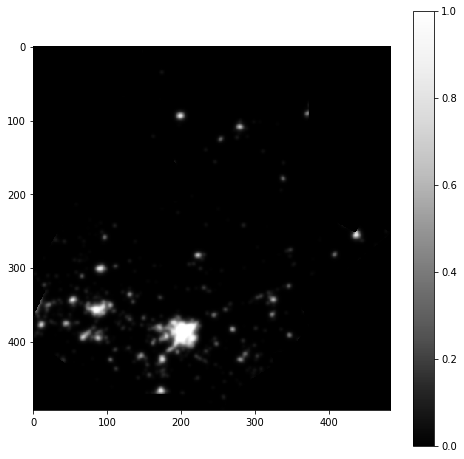

In [26]:
plt.figure(figsize = (8,8))
plt.imshow(bm_by_country['Guatemala']['mini_raster_array'], cmap='Greys_r')
plt.colorbar()
plt.show()

Guatemala HRSL:

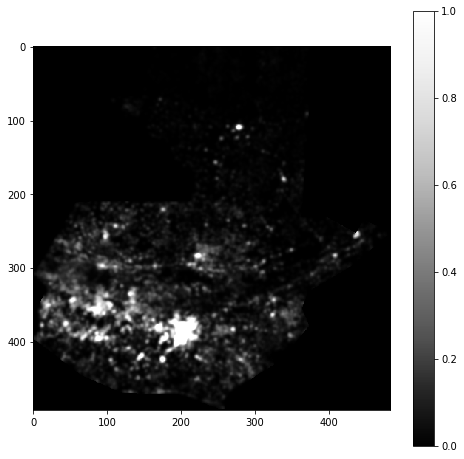

In [27]:
plt.figure(figsize = (8,8))
plt.imshow(hrsl_by_country_resized['Guatemala'], cmap='Greys_r')
plt.colorbar()
plt.show()

# People minus Lights for every GHSL country

In [28]:
people_minus_lights = {}

for i in country_codes.keys():
    diff = hrsl_by_country_resized[i] - bm_by_country[i]['mini_raster_array']
    people_minus_lights[i] = diff

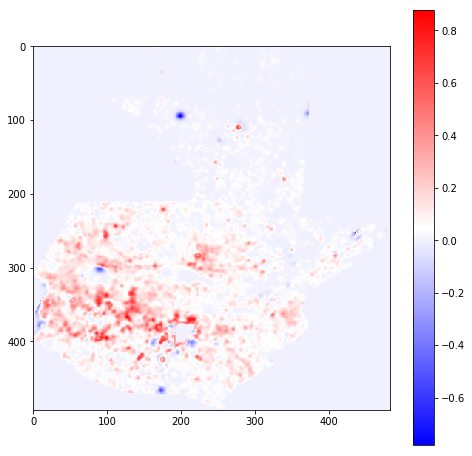

In [29]:
plt.figure(figsize = (8,8))
plt.imshow(people_minus_lights['Guatemala'], cmap='bwr')
plt.colorbar();

In [30]:
for i in tqdm(country_codes.keys()):
    country_code = country_codes[i]
    this_metadata = metadatas[i].copy()
    this_metadata['dtype'] = str(people_minus_lights[i].dtype)
    with rasterio.open('hrsl/{}/hrsl_{}_people_minus_lights.tif'.format(i, country_code),
                       'w', **this_metadata) as dst:
        dst.write(people_minus_lights[i], 1)

  0%|          | 0/24 [00:00<?, ?it/s]/anaconda/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
100%|██████████| 24/24 [01:12<00:00,  3.03s/it]


# Lights minus People for every GHSL country

In [31]:
lights_minus_people = {}

for i in country_codes.keys():
    diff = bm_by_country[i]['mini_raster_array'] - hrsl_by_country_resized[i]
    lights_minus_people[i] = diff

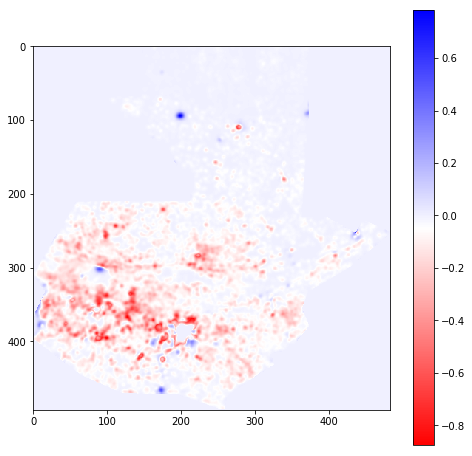

In [32]:
plt.figure(figsize = (8,8))
plt.imshow(lights_minus_people['Guatemala'], cmap='bwr_r')
plt.colorbar();

In [33]:
for i in tqdm(country_codes.keys()):
    country_code = country_codes[i]
    this_metadata = metadatas[i].copy()
    this_metadata['dtype'] = str(lights_minus_people[i].dtype)
    with rasterio.open('hrsl/{}/hrsl_{}_lights_minus_people.tif'.format(i, country_code),
                       'w', **this_metadata) as dst:
        dst.write(lights_minus_people[i], 1)

  0%|          | 0/24 [00:00<?, ?it/s]/anaconda/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
100%|██████████| 24/24 [01:14<00:00,  3.09s/it]


# Blob Detection

In [34]:
from skimage.feature import blob_log
import math

In [35]:
# function to convert row, col pixel coordinates to lat, lon
def pixel2coord(transform, row, col):
    ''' converts row col to lat, lon'''
    coff, roff = (0.5, 0.5)
    x, y = transform * transform.translation(coff, roff) * (col, row)
    return y, x

# function to detect blobs in image
def detect_blobs(array, transform, min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.2, overlap=1.0, log_scale=False):
    blobs = blob_log(array, min_sigma=min_sigma, max_sigma=max_sigma, 
                     num_sigma=num_sigma, threshold=threshold, 
                     overlap=overlap, log_scale=log_scale)
    # Compute blob radius in the 3rd column.
    blobs[:, 2] = blobs[:, 2] * math.sqrt(2)
    # Convert pixels to lat, lons
    affine_transform = transform
    blob_coords = [pixel2coord(affine_transform, i[0], i[1]) for i in blobs]
    return blobs, blob_coords

# Define custom blob detection parameters for every country

The below parameters were hand-tuned with the goal of detecting 3-5 blobs per country.

In [36]:
people_no_lights_blob_detection_parameters = {
    
    'Algeria':            dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.50, overlap=1.0),
    'Argentina':          dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.55, overlap=1.0),
    'Burkina_Faso':       dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.55, overlap=1.0),
    'Cambodia':           dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.50, overlap=1.0),
    'Ghana':              dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.40, overlap=1.0),
    'Guatemala':          dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.30, overlap=1.0),
    'Haiti':              dict(min_sigma=2, max_sigma=20, num_sigma=10, threshold=0.40, overlap=1.0),
    'Indonesia':          dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.52, overlap=1.0),
    'Ivory_Coast':        dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.55, overlap=1.0),
    'Kenya':              dict(min_sigma=4, max_sigma=50, num_sigma=10, threshold=0.50, overlap=1.0),
    'Madagascar':         dict(min_sigma=4, max_sigma=50, num_sigma=10, threshold=0.57, overlap=1.0),
    'Malawi':             dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.45, overlap=1.0),
    'Mexico':             dict(min_sigma=3, max_sigma=50, num_sigma=10, threshold=0.48, overlap=1.0),
    'Mozambique':         dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.55, overlap=1.0),
    'Nigeria':            dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.55, overlap=1.0),
    'Puerto_Rico':        dict(min_sigma=2, max_sigma=3, num_sigma=10, threshold=0.26, overlap=0.5),
    'Rwanda':             dict(min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.20, overlap=1.0),
    'South_Africa':       dict(min_sigma=5, max_sigma=10, num_sigma=10, threshold=0.30, overlap=1.0),
    'Sri_Lanka':          dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.30, overlap=1.0),
    'Tanzania':           dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.53, overlap=1.0),
    'Thailand':           dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.55, overlap=1.0),
    'The_Philippines':    dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.53, overlap=1.0),
    'Tunisia':            dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.32, overlap=1.0),
    'Uganda':             dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.50, overlap=1.0)

}

In [44]:
lights_no_people_blob_detection_parameters = {
    
    'Algeria':            dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.50, overlap=1.0),
    'Argentina':          dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.35, overlap=1.0),
    'Burkina_Faso':       dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.30, overlap=1.0),
    'Cambodia':           dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.35, overlap=1.0),
    'Ghana':              dict(min_sigma=2, max_sigma=25, num_sigma=10, threshold=0.25, overlap=1.0),
    'Guatemala':          dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.20, overlap=1.0),
    'Haiti':              dict(min_sigma=1, max_sigma=20, num_sigma=10, threshold=0.22, overlap=1.0),
    'Indonesia':          dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.44, overlap=1.0),
    'Ivory_Coast':        dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.22, overlap=1.0),
    'Kenya':              dict(min_sigma=4, max_sigma=50, num_sigma=10, threshold=0.30, overlap=1.0),
    'Madagascar':         dict(min_sigma=4, max_sigma=50, num_sigma=10, threshold=0.37, overlap=1.0),
    'Malawi':             dict(min_sigma=2, max_sigma=20, num_sigma=10, threshold=0.27, overlap=1.0),
    'Mexico':             dict(min_sigma=3, max_sigma=50, num_sigma=10, threshold=0.42, overlap=1.0),
    'Mozambique':         dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.35, overlap=1.0),
    'Nigeria':            dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.45, overlap=1.0),
    'Puerto_Rico':        dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.30, overlap=1.0),
    'Rwanda':             dict(min_sigma=1, max_sigma=20, num_sigma=10, threshold=0.30, overlap=1.0),
    'South_Africa':       dict(min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.32, overlap=1.0),
    'Sri_Lanka':          dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.20, overlap=1.0),
    'Tanzania':           dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.35, overlap=1.0),
    'Thailand':           dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.35, overlap=1.0),
    'The_Philippines':    dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.33, overlap=1.0),
    'Tunisia':            dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.30, overlap=1.0),
    'Uganda':             dict(min_sigma=2, max_sigma=50, num_sigma=10, threshold=0.25, overlap=1.0)

}

# Detect people no lights blobs

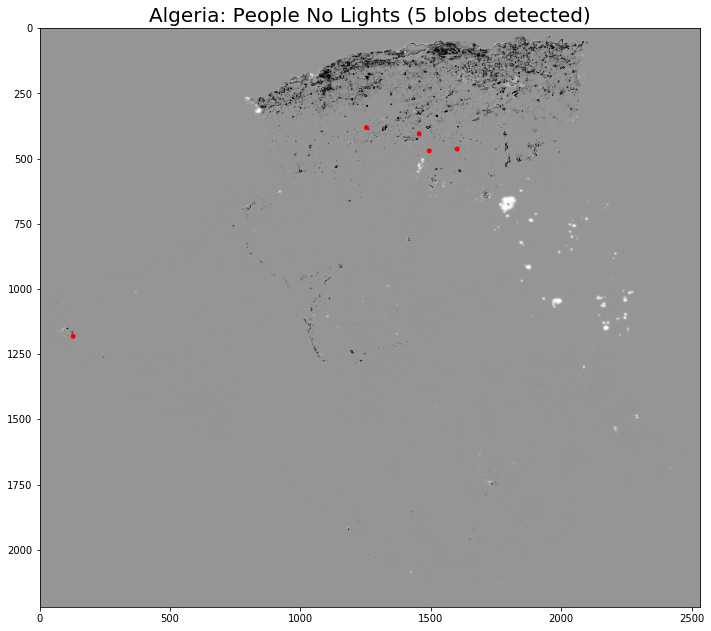

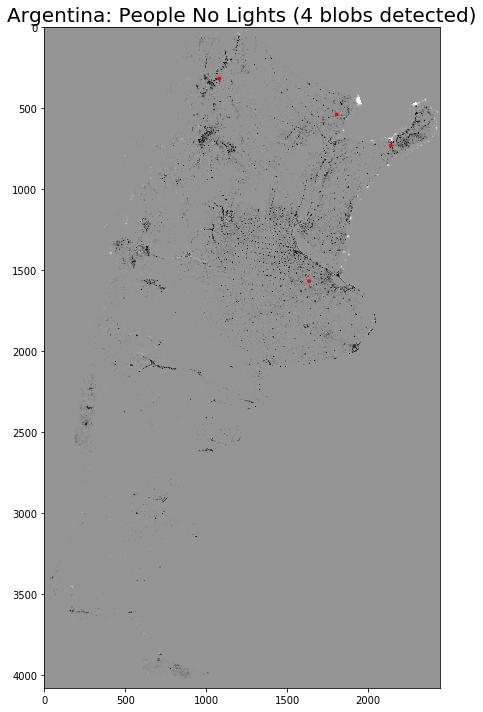

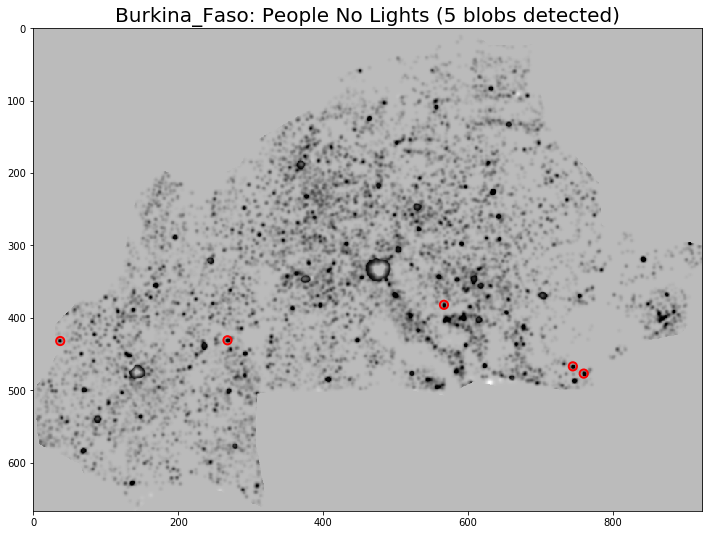

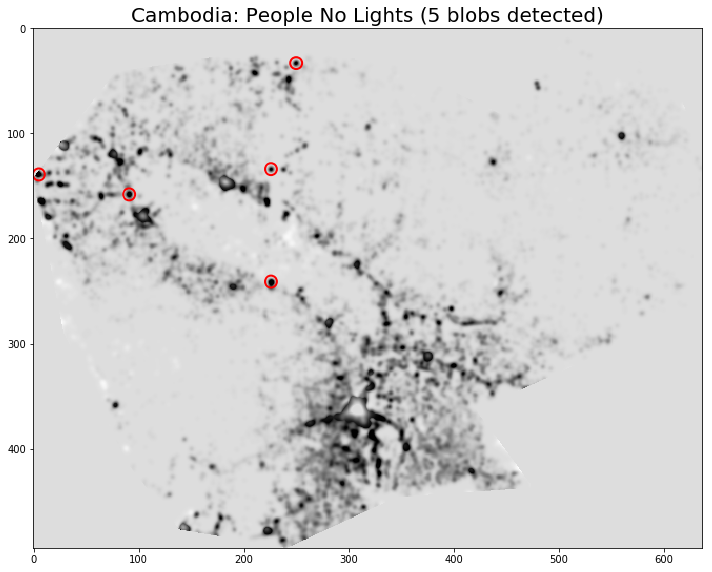

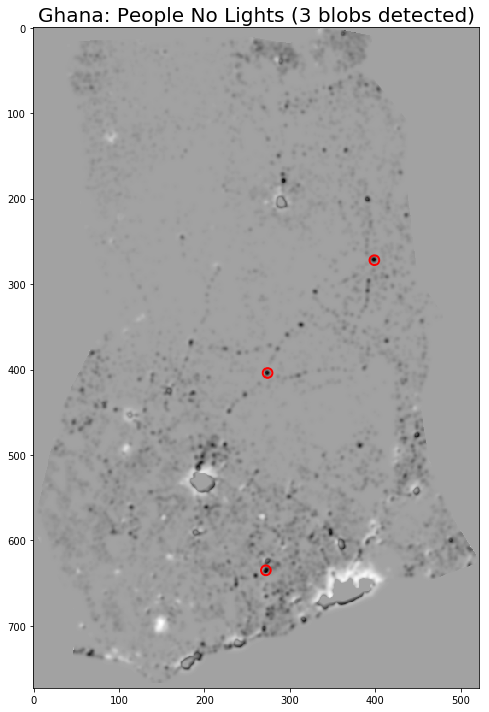

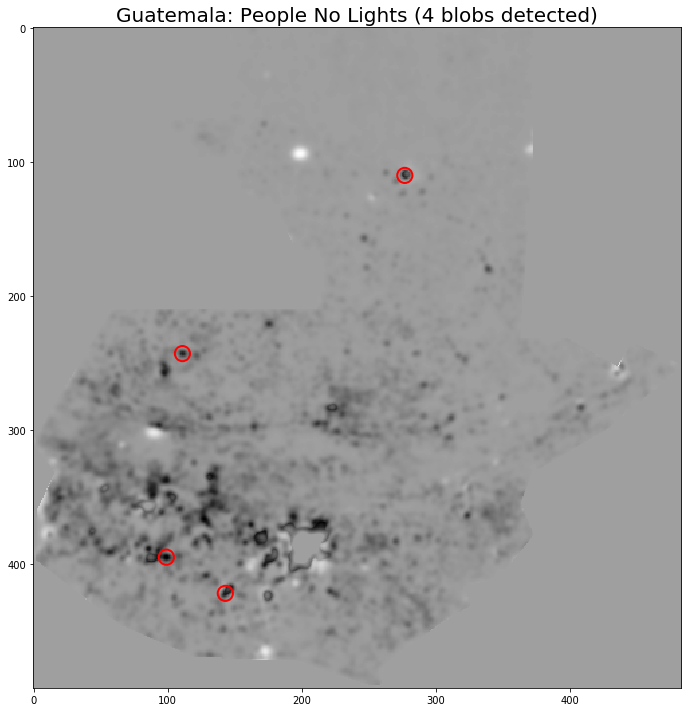

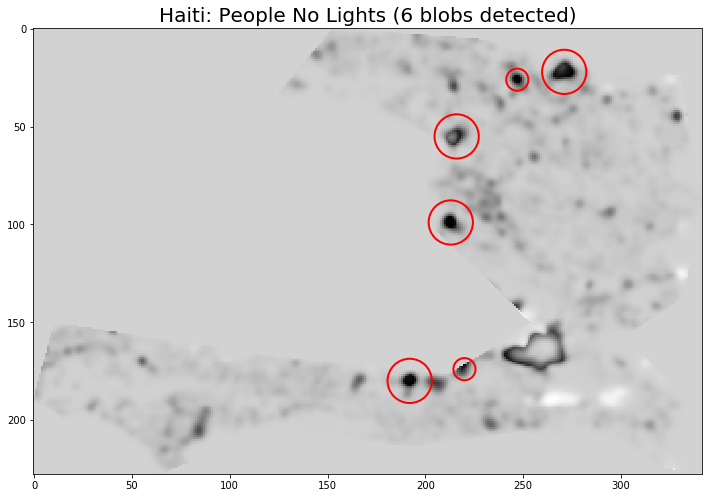

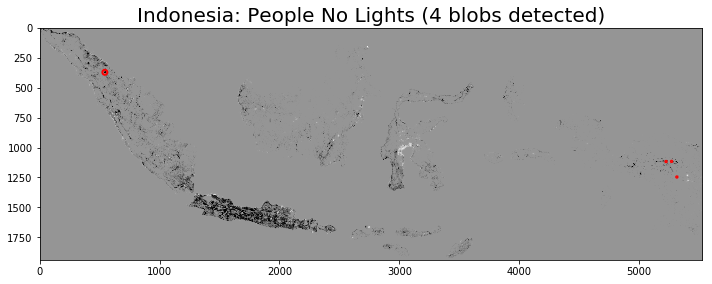

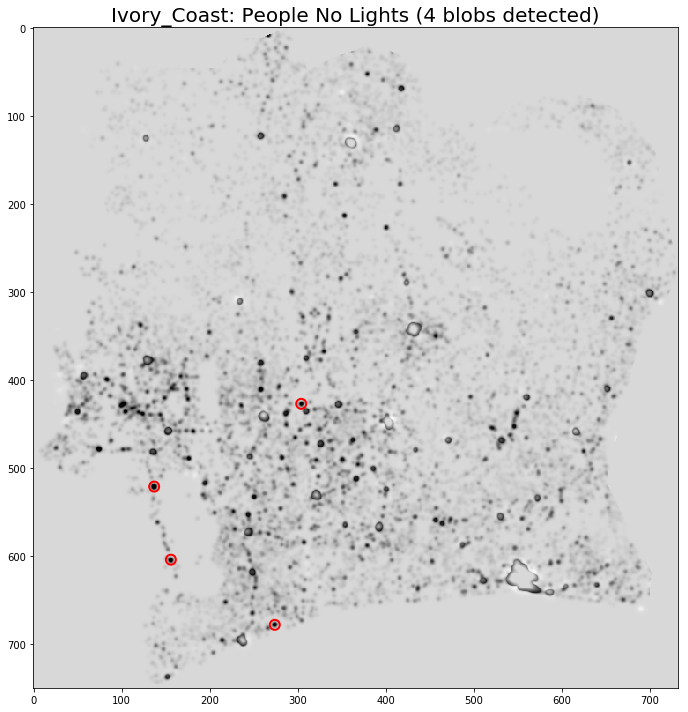

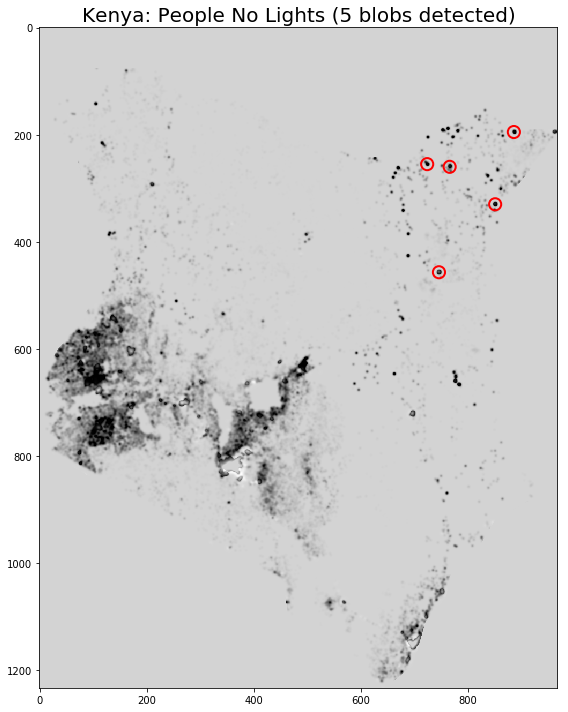

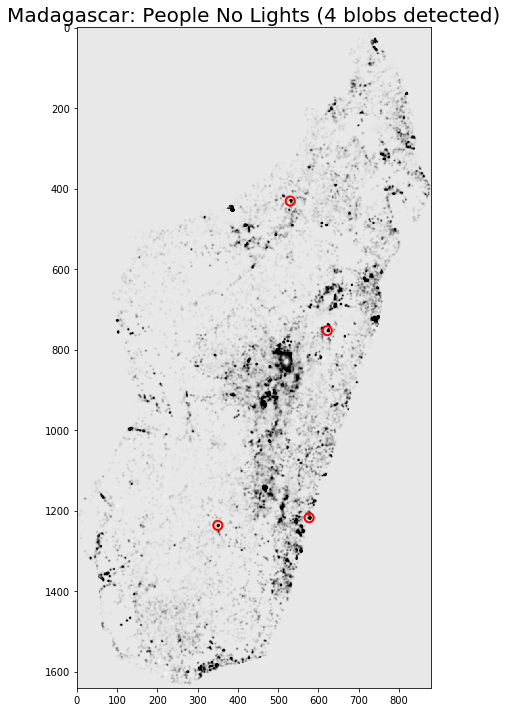

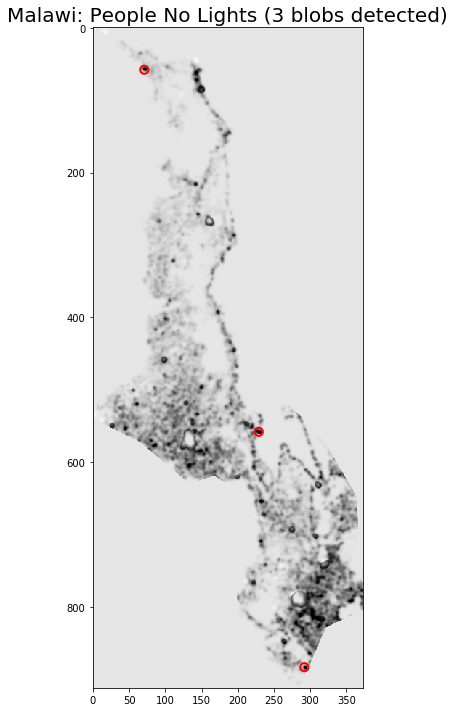

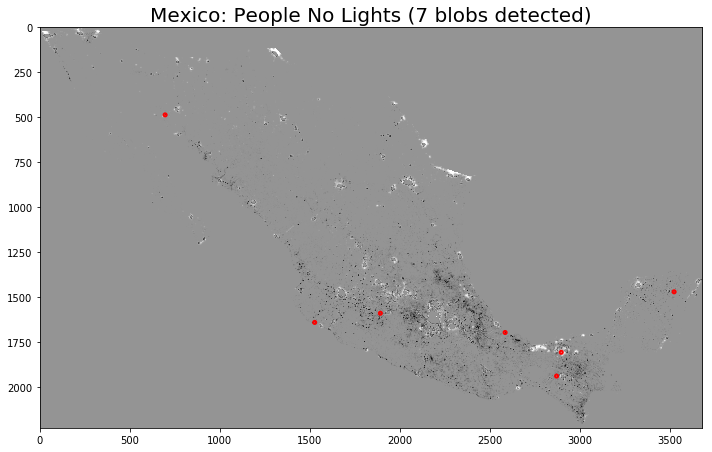

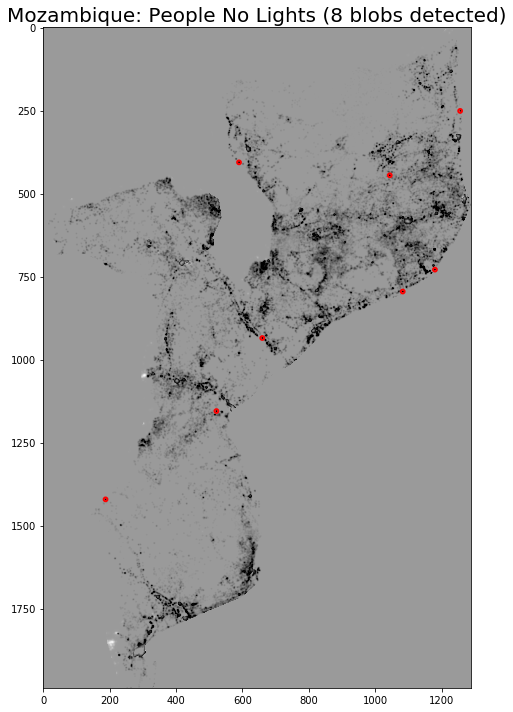

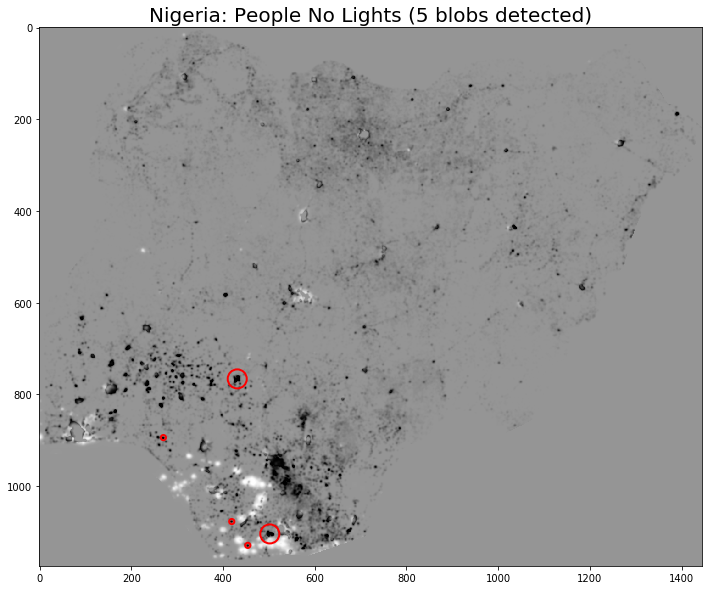

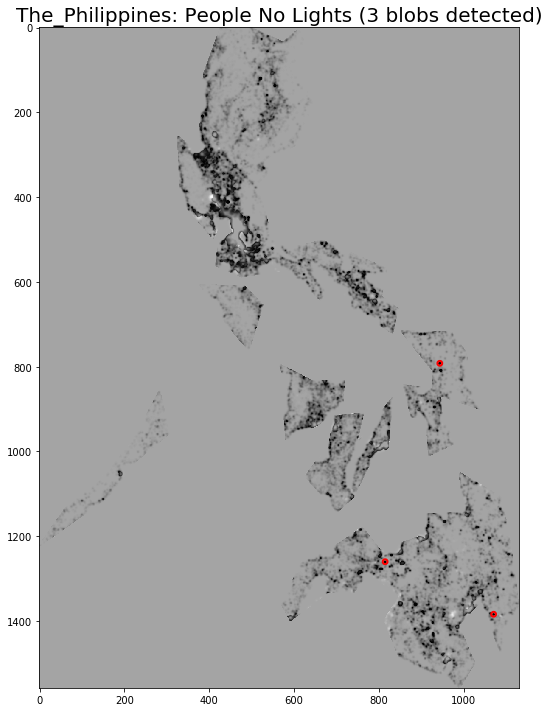

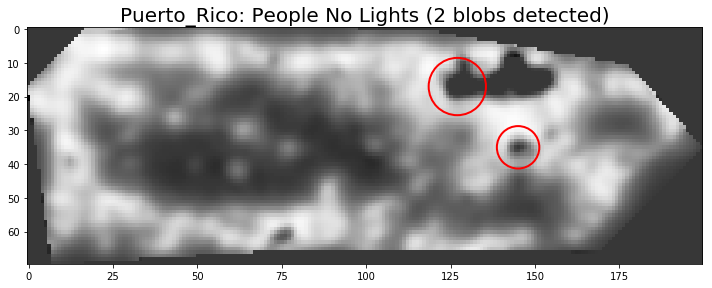

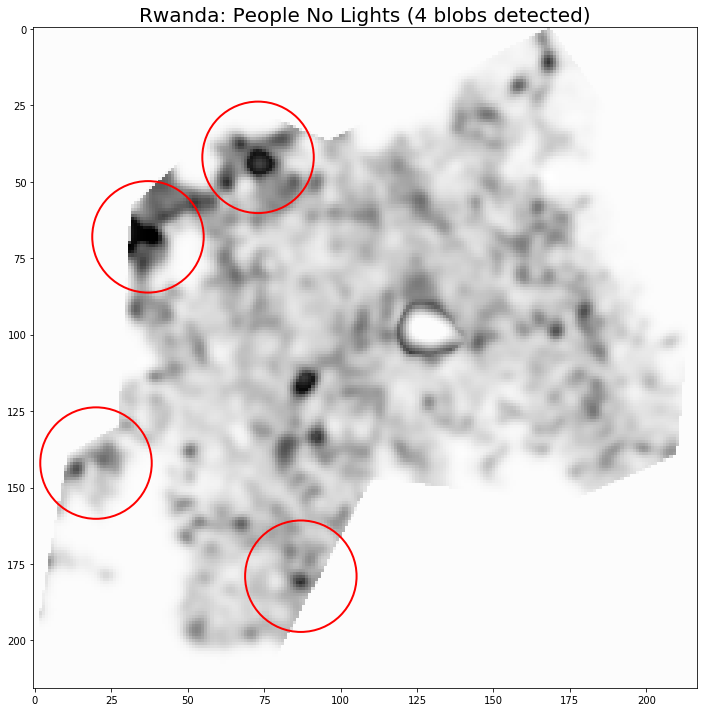

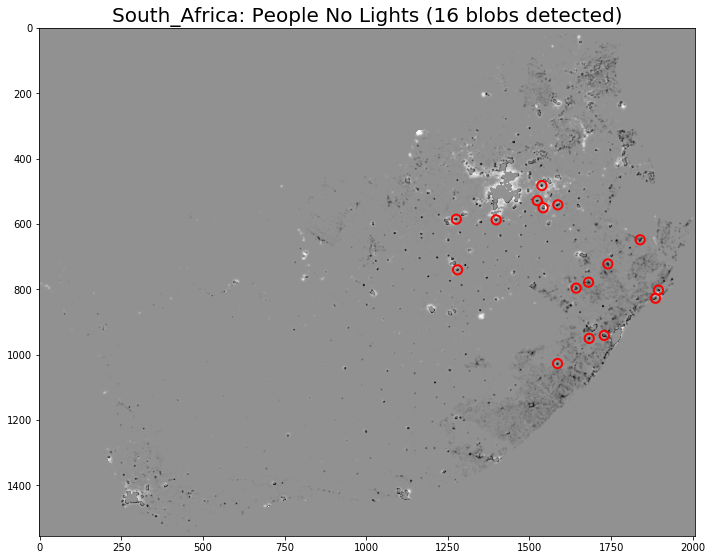

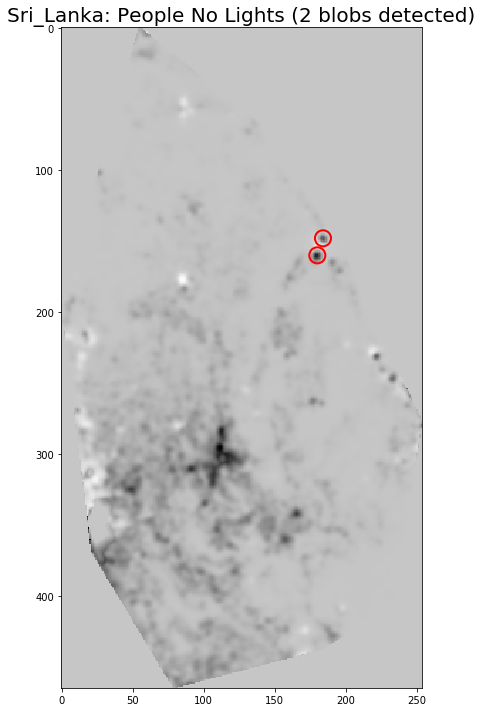

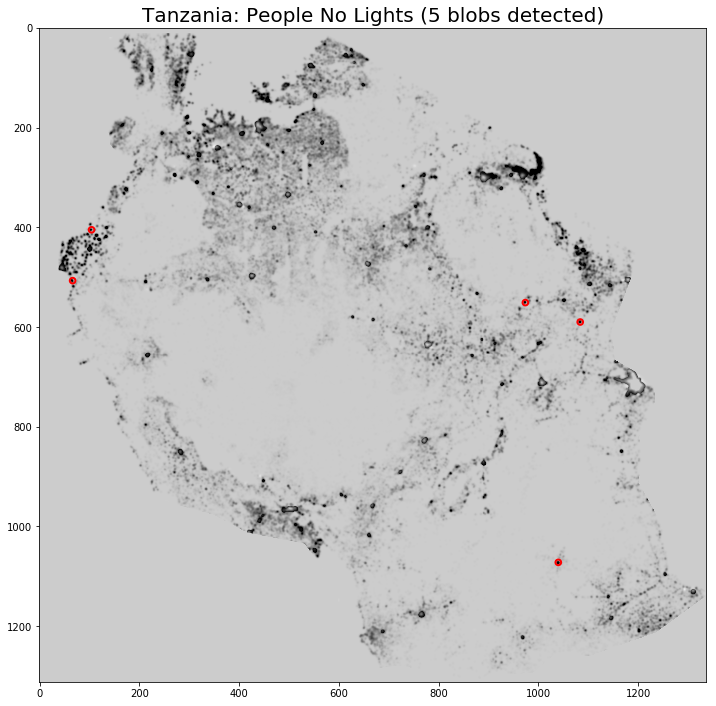

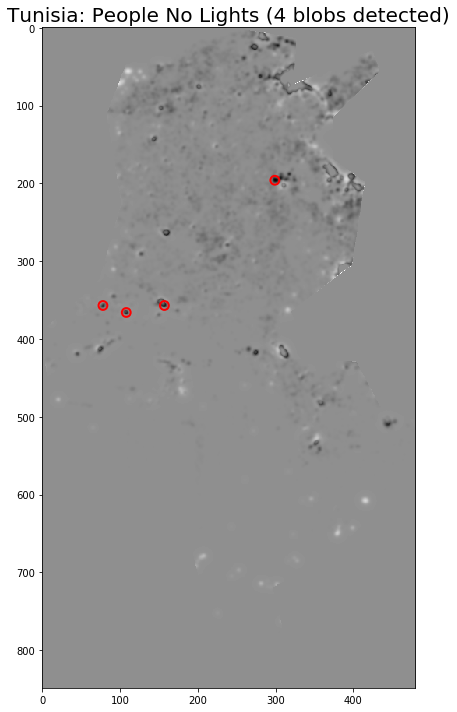

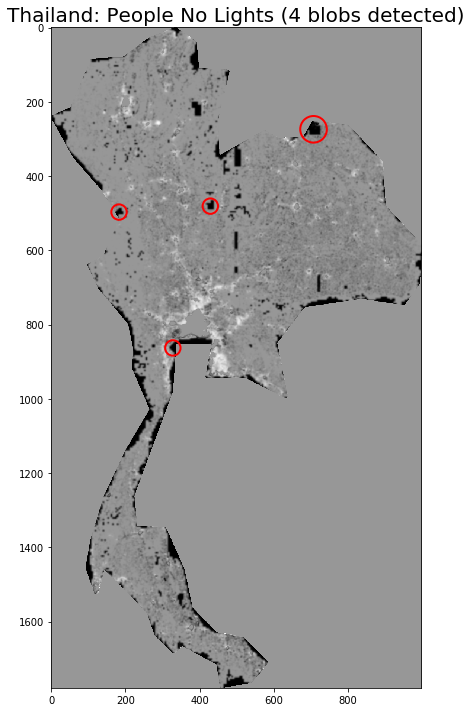

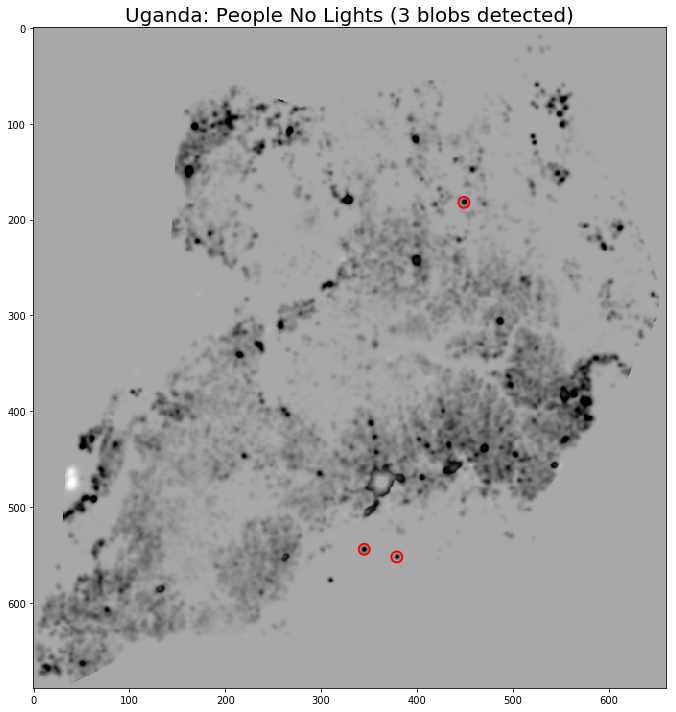

In [39]:
people_no_lights_blobs = {}

for i in country_codes.keys():
    
    # Get parameters
    min_sigma = people_no_lights_blob_detection_parameters[i]['min_sigma']
    max_sigma = people_no_lights_blob_detection_parameters[i]['max_sigma']
    num_sigma = people_no_lights_blob_detection_parameters[i]['num_sigma']
    threshold = people_no_lights_blob_detection_parameters[i]['threshold']
    overlap =   people_no_lights_blob_detection_parameters[i]['overlap']
    
    # Do blob detection
    blobs, blob_coords = detect_blobs(people_minus_lights[i], bm_by_country[i]['mini_raster_affine'], 
                            min_sigma=min_sigma, max_sigma=max_sigma, num_sigma=num_sigma,
                                      threshold=threshold, overlap=overlap)
    
    # Save results to dictionary
    people_no_lights_blobs[i] = blob_coords
    
    # Visualize blobs in raster
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)
    title="{}: People No Lights ({} blobs detected)".format(i, len(blob_coords))
    ax.set_title(title, fontsize=20)
    ax.imshow(people_minus_lights[i], interpolation='nearest', cmap='Greys')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r*2, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    plt.tight_layout()
    plt.show()

# Detect lights no people blobs

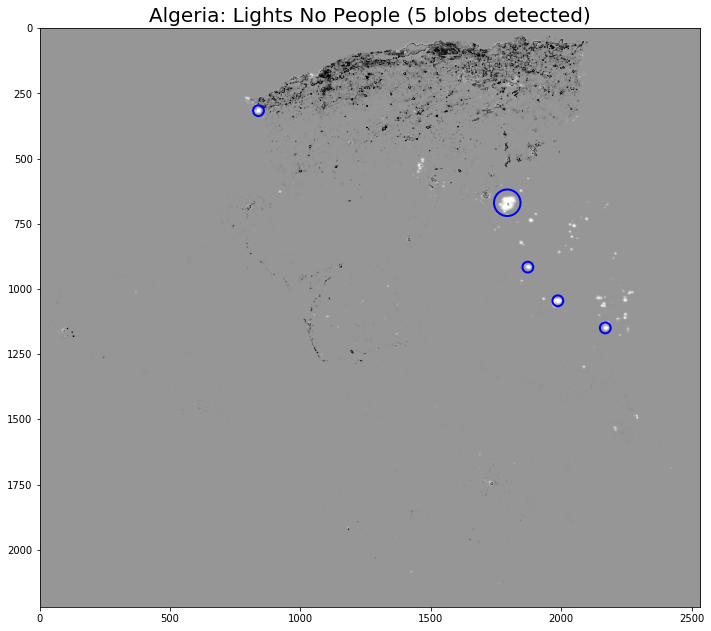

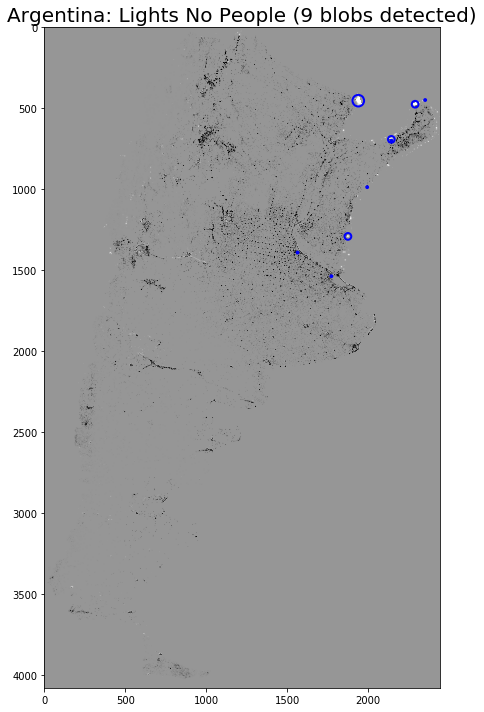

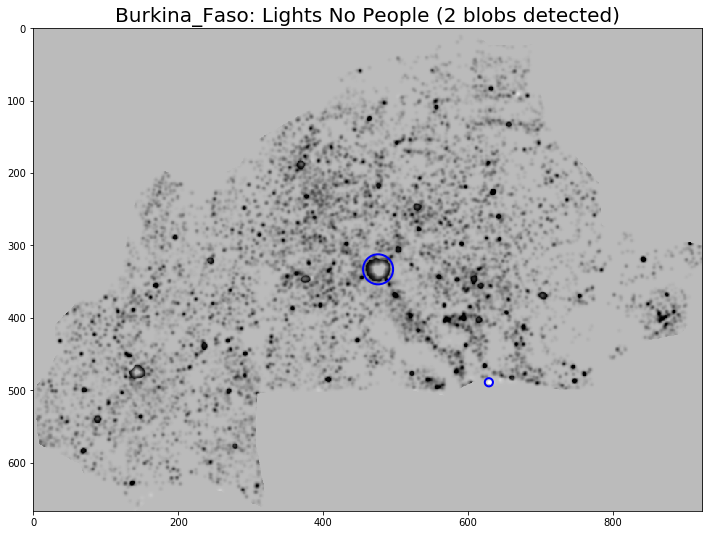

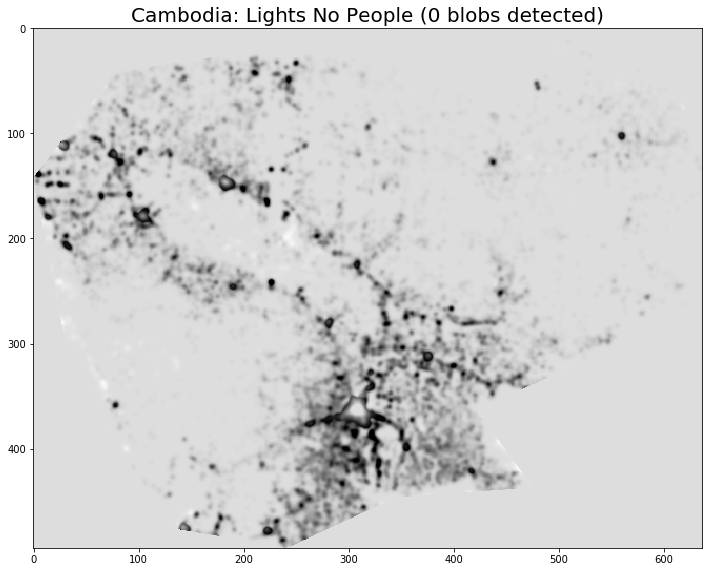

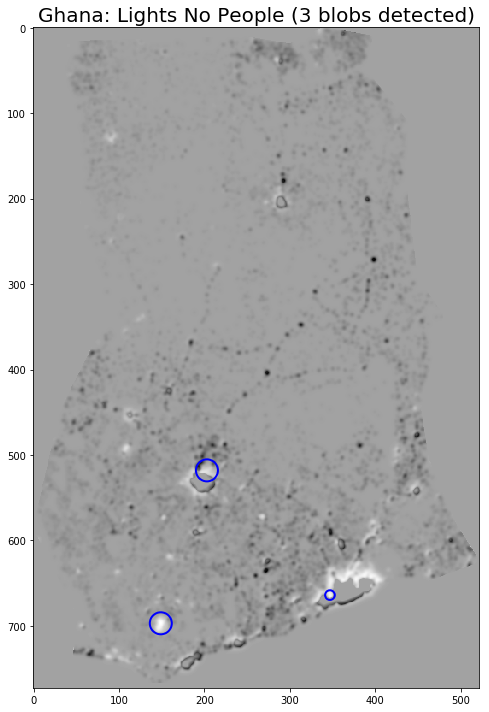

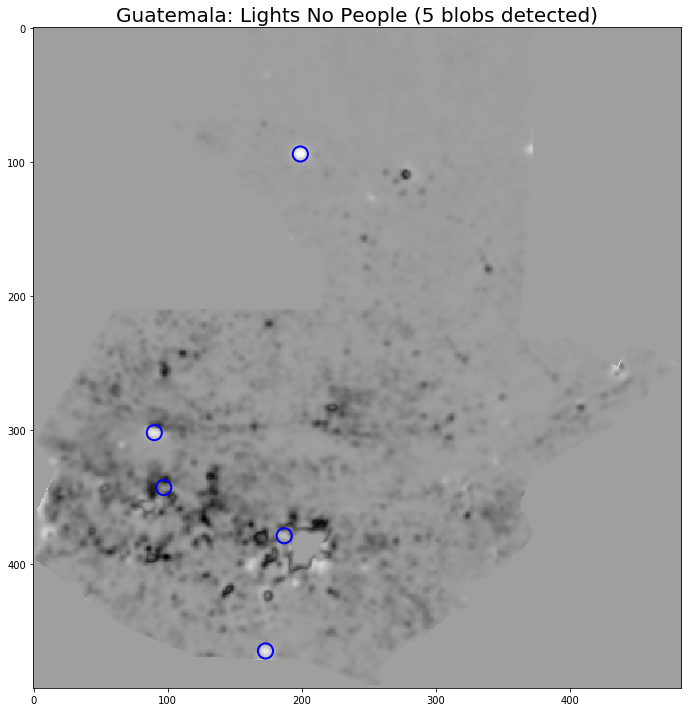

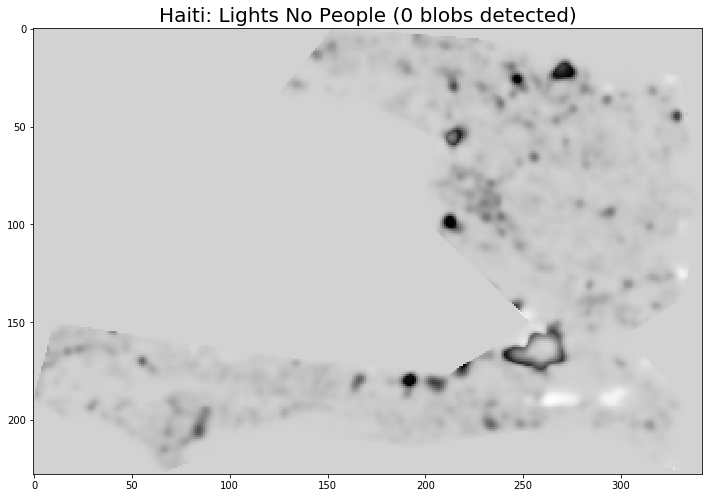

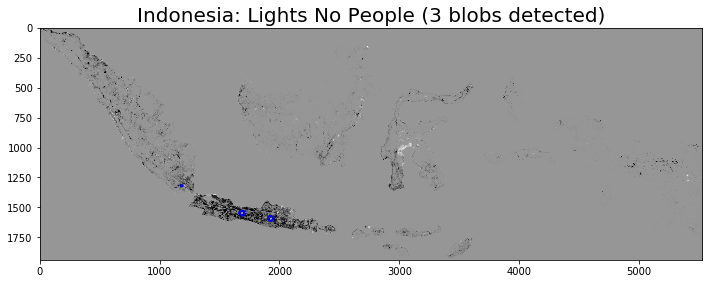

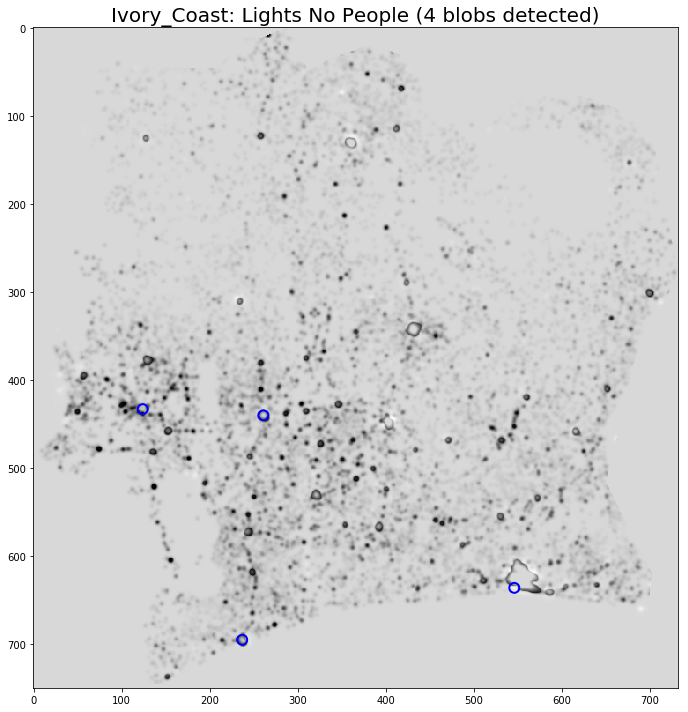

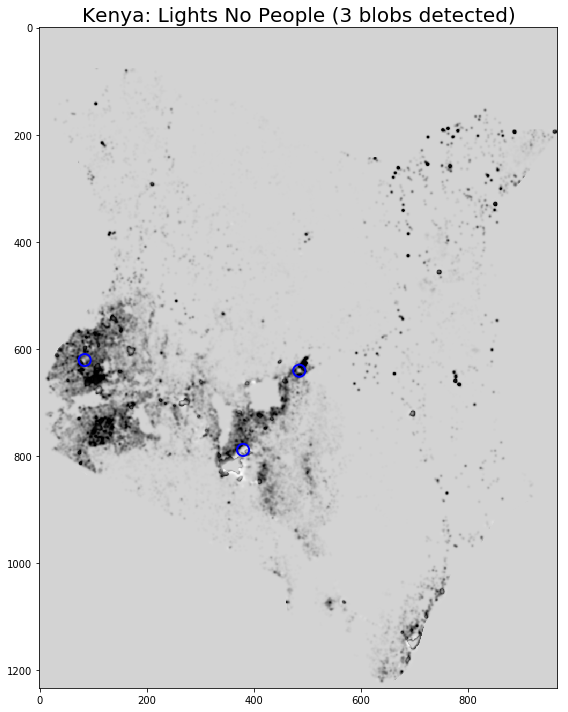

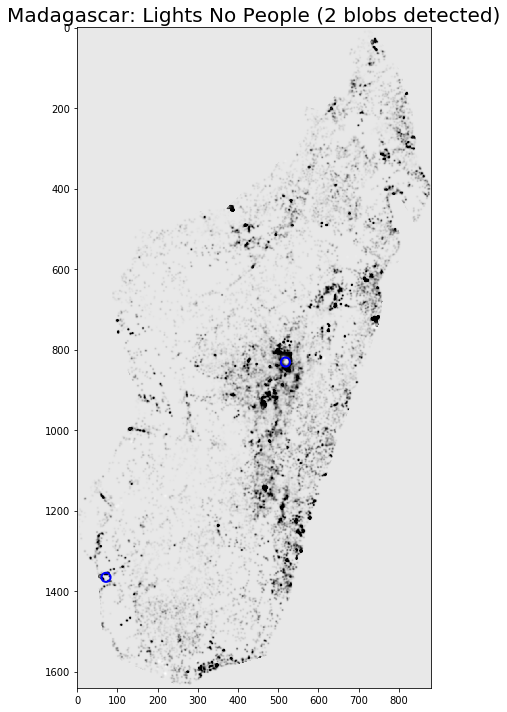

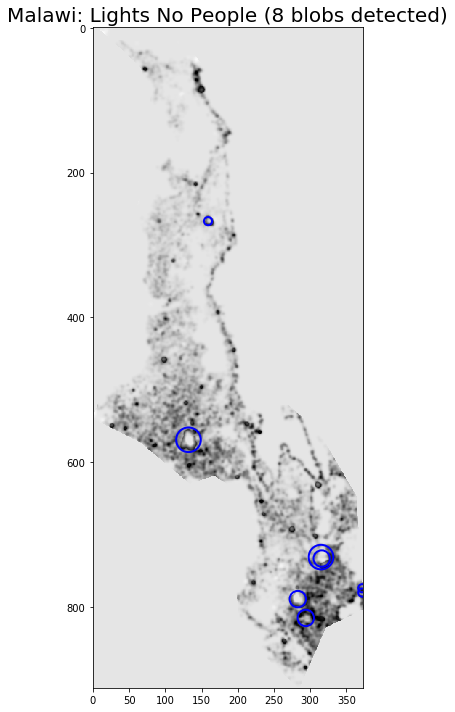

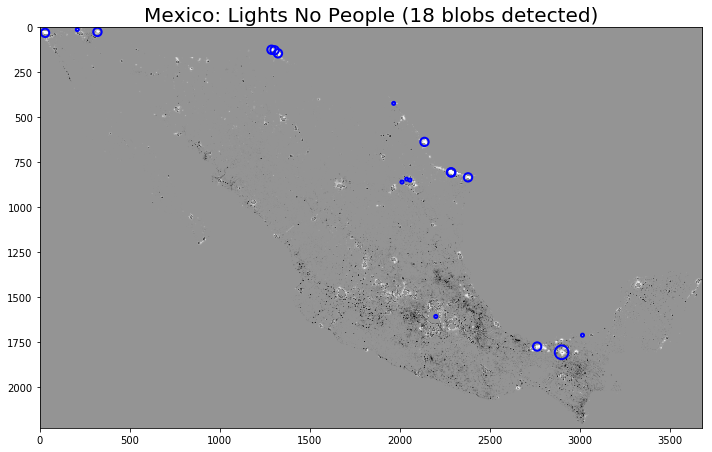

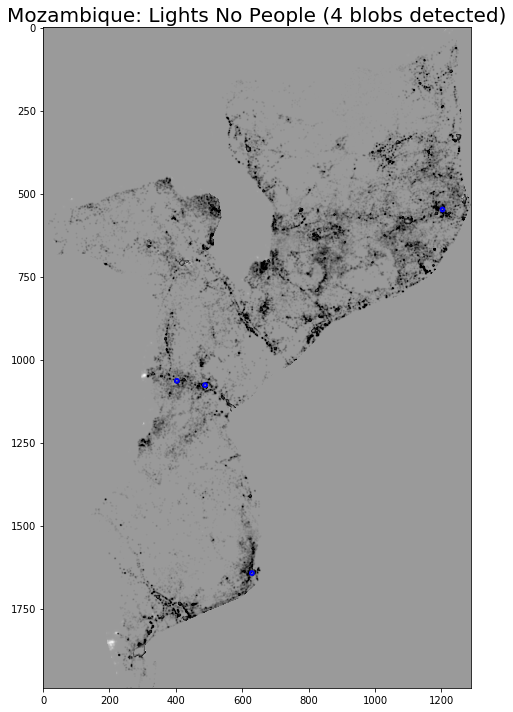

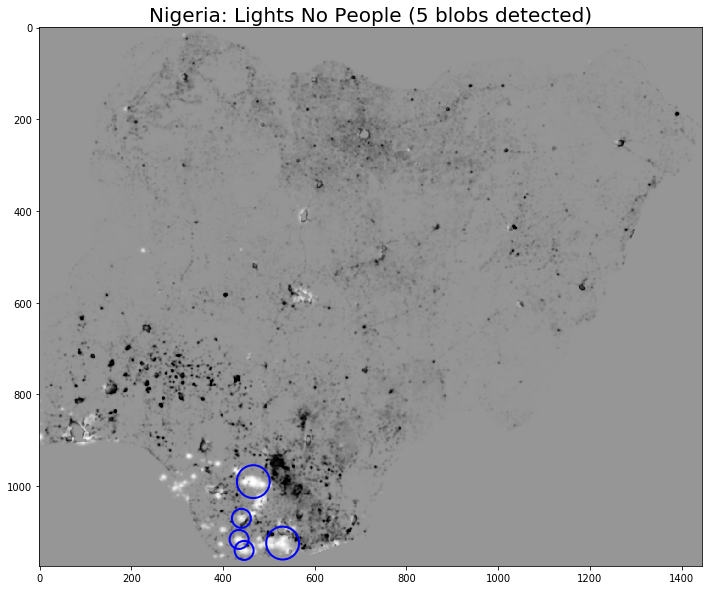

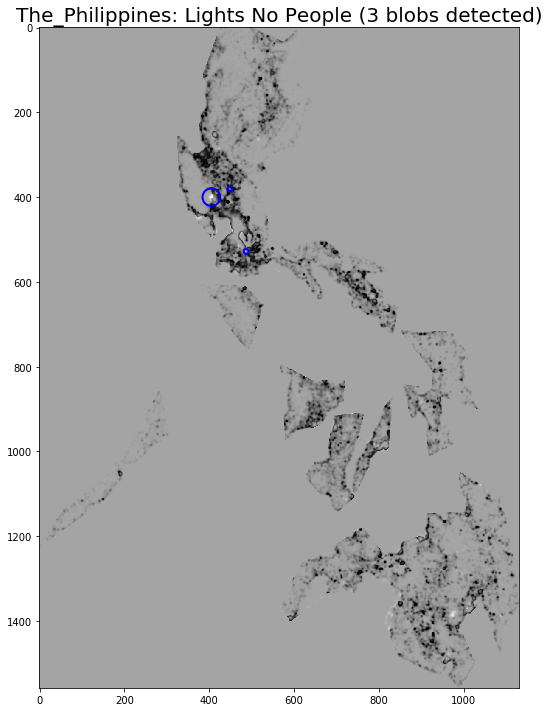

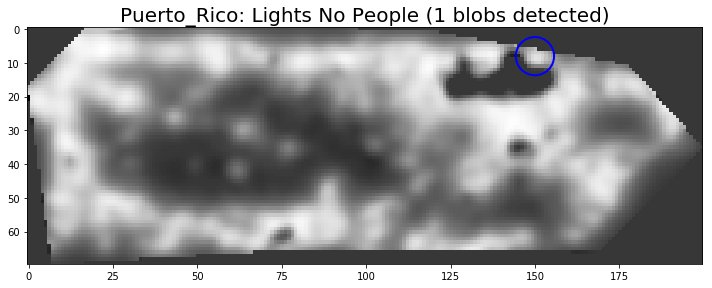

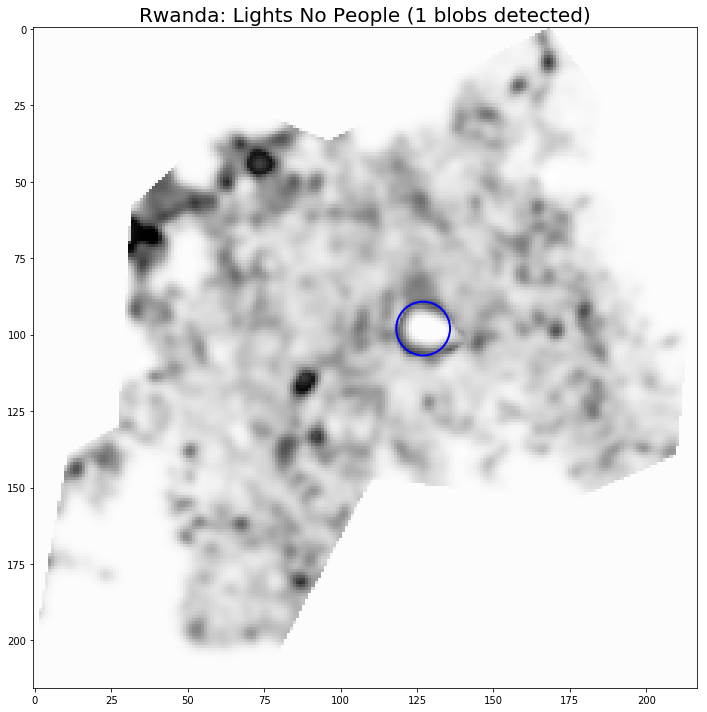

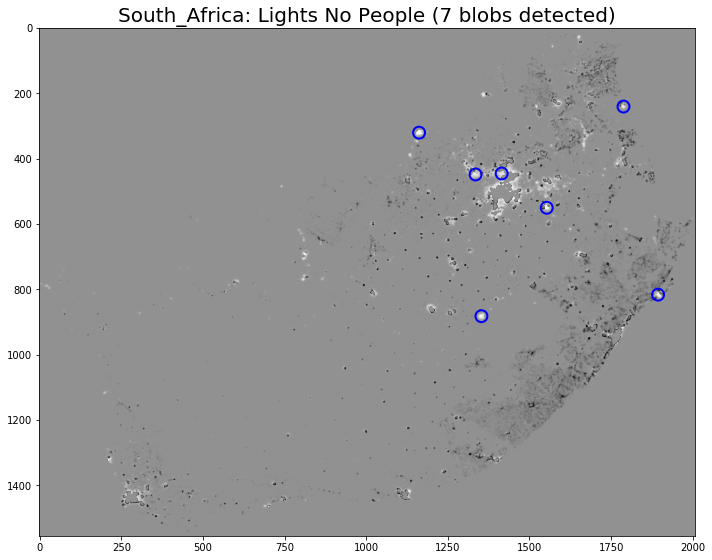

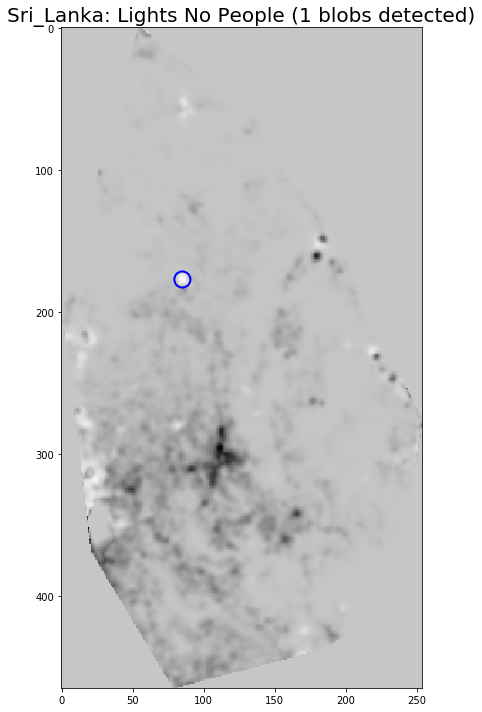

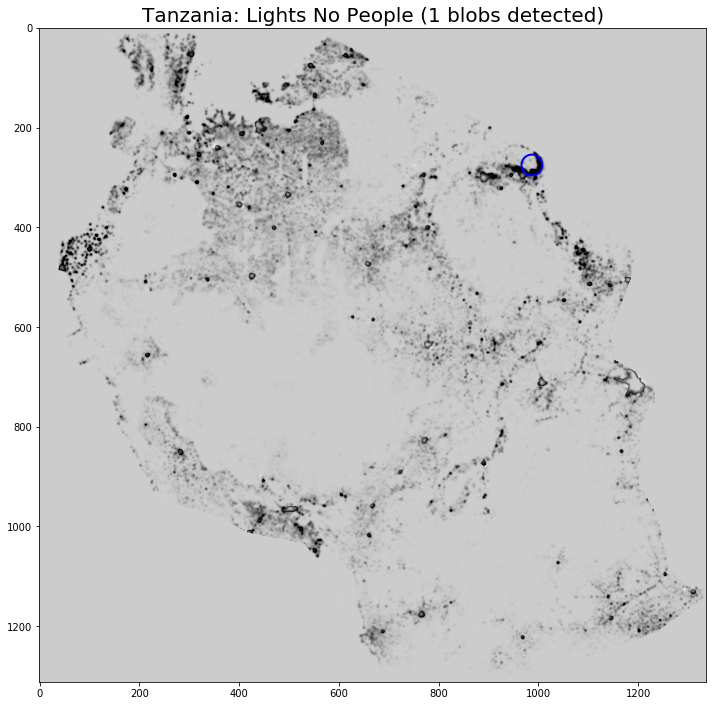

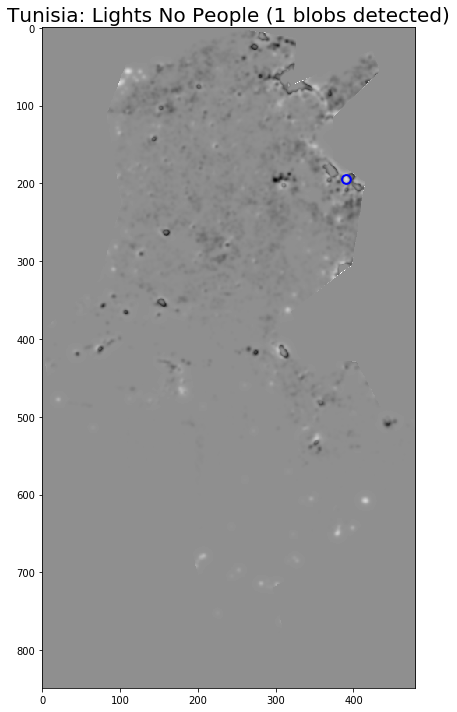

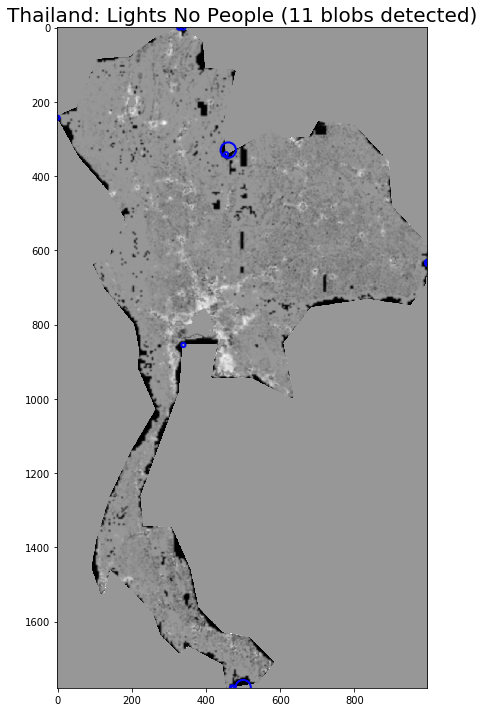

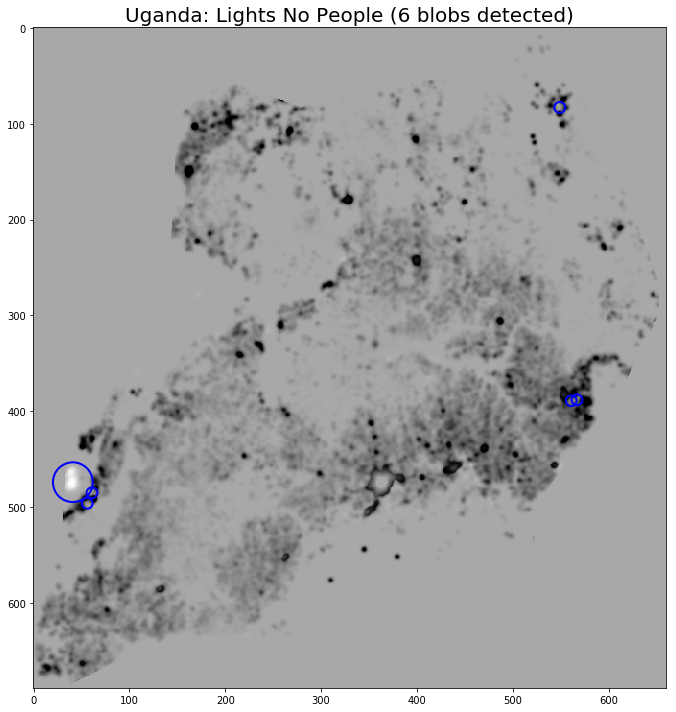

In [45]:
lights_no_people_blobs = {}

for i in country_codes.keys():
    
    # Get parameters
    min_sigma = lights_no_people_blob_detection_parameters[i]['min_sigma']
    max_sigma = lights_no_people_blob_detection_parameters[i]['max_sigma']
    num_sigma = lights_no_people_blob_detection_parameters[i]['num_sigma']
    threshold = lights_no_people_blob_detection_parameters[i]['threshold']
    overlap =   lights_no_people_blob_detection_parameters[i]['overlap']
    
    # Do blob detection
    blobs, blob_coords = detect_blobs(lights_minus_people[i], bm_by_country[i]['mini_raster_affine'], 
                            min_sigma=min_sigma, max_sigma=max_sigma, num_sigma=num_sigma, 
                                      threshold=threshold, overlap=overlap)
    
    # Save results to dictionary
    lights_no_people_blobs[i] = blob_coords
    
    # Visualize blobs in raster
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)
    title="{}: Lights No People ({} blobs detected)".format(i, len(blob_coords))
    ax.set_title(title, fontsize=20)
    ax.imshow(lights_minus_people[i], interpolation='nearest', cmap='Greys_r')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r*2, color='blue', linewidth=2, fill=False)
        ax.add_patch(c)
    plt.tight_layout()
    plt.show()

# Save blob centroids to CSV

In [41]:
import pandas as pd

In [42]:
countries = []
lats = []
lons = []
categories = []

for i in people_no_lights_blobs.keys():
    coords = people_no_lights_blobs[i]
    for coord in coords:
        countries.append(i)
        lats.append(coord[0])
        lons.append(coord[1])
        categories.append('people_no_lights')
        
for i in lights_no_people_blobs.keys():
    coords = lights_no_people_blobs[i]
    for coord in coords:
        countries.append(i)
        lats.append(coord[0])
        lons.append(coord[1])
        categories.append('lights_no_people')
        
output = pd.DataFrame()
output['country'] = countries
output['latitude'] = lats
output['longitude'] = lons
output['category'] = categories

In [47]:
output.to_csv("hrsl/blob_centroids.csv")